<a href="https://colab.research.google.com/github/nadja-d/laundryai/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pandas as pd


In [ ]:
trs_df = pd.read_csv('trs_data.csv')
mcn_df = pd.read_csv('mcn_data.csv')


In [ ]:
trs_df.head()

,Date,Wash Income,Dry Income,Total Income
0,2024-01-01,"Rp. 1,010,000.00","Rp. 450,000.00","Rp. 1,460,000.00"
1,2024-01-02,"Rp. 1,190,000.00","Rp. 400,000.00","Rp. 1,590,000.00"
2,2024-01-03,"Rp. 990,000.00","Rp. 400,000.00","Rp. 1,390,000.00"
3,2024-01-04,"Rp. 1,070,000.00","Rp. 480,000.00","Rp. 1,550,000.00"
4,2024-01-05,"Rp. 1,020,000.00","Rp. 540,000.00","Rp. 1,560,000.00"


In [ ]:
mcn_df.head()

,Date,wash 1,wash 2,wash 3,wash 4,wash 5,wash 6,wash 7,dry 1,dry 2,dry 3,dry 4,dry 5
0,2024-01-01,8.0,12.0,16.0,21.0,13.0,17.0,14.0,6.0,8.0,11.0,15.0,5.0
1,2024-01-02,13.0,12.0,15.0,17.0,23.0,18.0,21.0,12.0,3.0,13.0,12.0,0.0
2,2024-01-03,10.0,9.0,18.0,16.0,12.0,15.0,19.0,7.0,6.0,10.0,14.0,3.0
3,2024-01-04,11.0,14.0,17.0,22.0,14.0,16.0,13.0,5.0,9.0,12.0,16.0,6.0
4,2024-01-05,9.0,11.0,14.0,19.0,15.0,19.0,15.0,8.0,10.0,14.0,18.0,4.0


In [ ]:
mcn_df["Date"] = pd.to_datetime(mcn_df["Date"])

In [ ]:
mcn_df["Date"].dtypes

dtype('<M8[ns]')

In [ ]:
mcn_df.describe()

,Date,wash 1,wash 2,wash 3,wash 4,wash 5,wash 6,wash 7,dry 1,dry 2,dry 3,dry 4,dry 5
count,90,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2024-02-14 12:00:00,24.344262,23.262295,23.393443,25.655738,23.983607,25.163934,24.721311,19.196721,18.606557,20.360656,18.721311,16.377049
min,2024-01-01 00:00:00,8.000000,9.000000,11.000000,12.000000,10.000000,10.000000,11.000000,5.000000,0.000000,10.000000,0.000000,0.000000
25%,2024-01-23 06:00:00,17.000000,18.000000,18.000000,19.000000,16.000000,19.000000,20.000000,12.000000,12.000000,15.000000,14.000000,10.000000
50%,2024-02-14 12:00:00,24.000000,22.000000,22.000000,23.000000,22.000000,21.000000,23.000000,20.000000,19.000000,21.000000,20.000000,16.000000
75%,2024-03-07 18:00:00,32.000000,29.000000,29.000000,31.000000,29.000000,31.000000,30.000000,23.000000,23.000000,23.000000,23.000000,22.000000
max,2024-03-30 00:00:00,45.000000,56.000000,46.000000,54.000000,64.000000,61.000000,47.000000,34.000000,39.000000,43.000000,32.000000,40.000000
std,NaN,8.953370,8.602135,7.543825,9.268019,11.287887,11.545822,7.698769,7.424778,8.079354,7.307605,7.461303,9.633559


In [ ]:
mcn_df.isna().sum()

Date       0
wash 1    29
wash 2    29
wash 3    29
wash 4    29
wash 5    29
wash 6    29
wash 7    29
dry 1     29
dry 2     29
dry 3     29
dry 4     29
dry 5     29
dtype: int64

In [ ]:
mcn_df.dropna(inplace=True)

In [ ]:
mcn_df.head(61)

,Date,wash 1,wash 2,wash 3,wash 4,wash 5,wash 6,wash 7,dry 1,dry 2,dry 3,dry 4,dry 5
0,2024-01-01,8.0,12.0,16.0,21.0,13.0,17.0,14.0,6.0,8.0,11.0,15.0,5.0
1,2024-01-02,13.0,12.0,15.0,17.0,23.0,18.0,21.0,12.0,3.0,13.0,12.0,0.0
2,2024-01-03,10.0,9.0,18.0,16.0,12.0,15.0,19.0,7.0,6.0,10.0,14.0,3.0
3,2024-01-04,11.0,14.0,17.0,22.0,14.0,16.0,13.0,5.0,9.0,12.0,16.0,6.0
4,2024-01-05,9.0,11.0,14.0,19.0,15.0,19.0,15.0,8.0,10.0,14.0,18.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-02-26,23.0,34.0,17.0,15.0,10.0,21.0,18.0,21.0,22.0,12.0,11.0,0.0
57,2024-02-27,21.0,22.0,16.0,19.0,21.0,31.0,19.0,23.0,16.0,14.0,21.0,22.0
58,2024-02-28,34.0,24.0,22.0,20.0,17.0,22.0,21.0,32.0,21.0,33.0,20.0,21.0
59,2024-02-29,35.0,32.0,22.0,41.0,21.0,19.0,22.0,21.0,31.0,21.0,24.0,12.0


In [ ]:
mcn_df["Date"] = pd.to_datetime(mcn_df["Date"])

In [ ]:
mcn_df.sort_values("Date", inplace=True)
mcn_df

,Date,wash 1,wash 2,wash 3,wash 4,wash 5,wash 6,wash 7,dry 1,dry 2,dry 3,dry 4,dry 5,TotalCycles
0,2024-01-01,8.0,12.0,16.0,21.0,13.0,17.0,14.0,6.0,8.0,11.0,15.0,5.0,146.0
1,2024-01-02,13.0,12.0,15.0,17.0,23.0,18.0,21.0,12.0,3.0,13.0,12.0,0.0,159.0
2,2024-01-03,10.0,9.0,18.0,16.0,12.0,15.0,19.0,7.0,6.0,10.0,14.0,3.0,139.0
3,2024-01-04,11.0,14.0,17.0,22.0,14.0,16.0,13.0,5.0,9.0,12.0,16.0,6.0,155.0
4,2024-01-05,9.0,11.0,14.0,19.0,15.0,19.0,15.0,8.0,10.0,14.0,18.0,4.0,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-02-26,23.0,34.0,17.0,15.0,10.0,21.0,18.0,21.0,22.0,12.0,11.0,0.0,204.0
57,2024-02-27,21.0,22.0,16.0,19.0,21.0,31.0,19.0,23.0,16.0,14.0,21.0,22.0,245.0
58,2024-02-28,34.0,24.0,22.0,20.0,17.0,22.0,21.0,32.0,21.0,33.0,20.0,21.0,287.0
59,2024-02-29,35.0,32.0,22.0,41.0,21.0,19.0,22.0,21.0,31.0,21.0,24.0,12.0,301.0


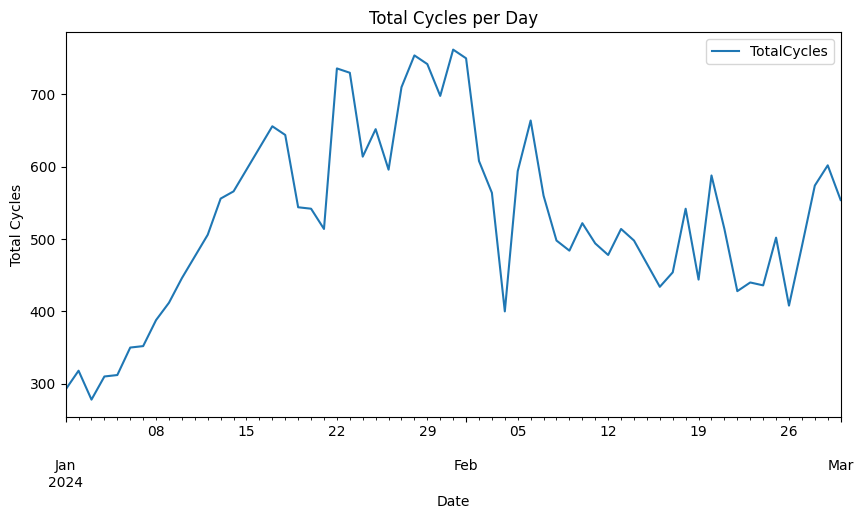

In [ ]:
mcn_df["TotalCycles"] = mcn_df.drop(columns=["Date"]).sum(axis=1)
mcn_df.plot(x="Date", y="TotalCycles", kind="line", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Total Cycles")
plt.title("Total Cycles per Day")
plt.show()


In [ ]:
mcn_df["TotalCycles"]


0     146.0
1     159.0
2     139.0
3     155.0
4     156.0
      ...  
85      0.0
86      0.0
87      0.0
88      0.0
89      0.0
Name: TotalCycles, Length: 90, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

total_cycles = mcn_df[["Date", "TotalCycles"]]

scaler = MinMaxScaler(feature_range=(0, 1))
total_cycles["TotalCycles"] = scaler.fit_transform(total_cycles[["TotalCycles"]])

def create_sequences(input_data, n_steps):
    X, y = [], []
    for i in range(len(input_data) - n_steps):
        end_ix = i + n_steps
        seq_x, seq_y = input_data[i:end_ix], input_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# We use the last 7 days of February as validation set
n_steps = 7  # Use 7 days to predict the 8th day
X, y = create_sequences(total_cycles['TotalCycles'].values, n_steps)


/var/folders/yg/gk3kh2hn45gb3sb4nslzjfy00000gn/T/ipykernel_2150/1283116883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_cycles["TotalCycles"] = scaler.fit_transform(total_cycles[["TotalCycles"]])


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))



In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

history = model.fit(X_train_reshaped, y_train, epochs=200, validation_data=(X_val_reshaped, y_val),batch_size=32, verbose=0, callbacks=[early_stopping])

model.evaluate(X_val_reshaped, y_val)

y_pred = model.predict(X_val_reshaped)


1/1 [==============================] - 0s 377ms/step


In [ ]:
y_pred

array([[0.46205404],
       [0.4620006 ],
       [0.46582156],
       [0.47056368],
       [0.47790116],
       [0.47836387],
       [0.4636484 ],
       [0.46445054],
       [0.43834046],
       [0.43602464],
       [0.45844015]], dtype=float32)

In [ ]:
# Assuming 'predictions' is your array of normalized prediction results

# Now 'inverse_predictions' contains the predictions in the original scale
print(y_pred)


[[0.46925843]
 [0.46803004]
 [0.47122526]
 [0.4764682 ]
 [0.48541105]
 [0.48731863]
 [0.47166848]
 [0.47310936]
 [0.44510722]
 [0.4409542 ]
 [0.4627121 ]]


In [ ]:
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
import pandas as pd

# Assuming your last date in the dataset was March 1st, 2024
last_date = pd.to_datetime('2024-03-01')
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(y_pred), freq='D')

predictions_df = pd.DataFrame({
    'Date': prediction_dates,
    'PredictedTotalCycles': y_pred.flatten()  # Flatten the array if it's 2D
})


In [ ]:
predictions_df

,Date,PredictedTotalCycles
0,2024-03-02,505.121063
1,2024-03-03,504.526550
2,2024-03-04,506.073029
3,2024-03-05,508.610596
4,2024-03-06,512.938965
5,2024-03-07,513.862244
6,2024-03-08,506.287537
7,2024-03-09,506.984924
8,2024-03-10,493.431885
9,2024-03-11,491.421844


In [ ]:
# Merge predictions with actual data
evaluation_df = predictions_df.merge(mcn_df[["Date", "TotalCycles"]], on='Date', how='left')

# Calculate evaluation metrics, e.g., Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(mcn_df['TotalCycles'].head(11), predictions_df['PredictedTotalCycles'])
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 147.01921220259234


In [ ]:
evaluation_df

,Date,PredictedTotalCycles,TotalCycles
0,2024-03-02,505.121063,NaN
1,2024-03-03,504.526550,NaN
2,2024-03-04,506.073029,NaN
3,2024-03-05,508.610596,NaN
4,2024-03-06,512.938965,NaN
5,2024-03-07,513.862244,NaN
6,2024-03-08,506.287537,NaN
7,2024-03-09,506.984924,NaN
8,2024-03-10,493.431885,NaN
9,2024-03-11,491.421844,NaN


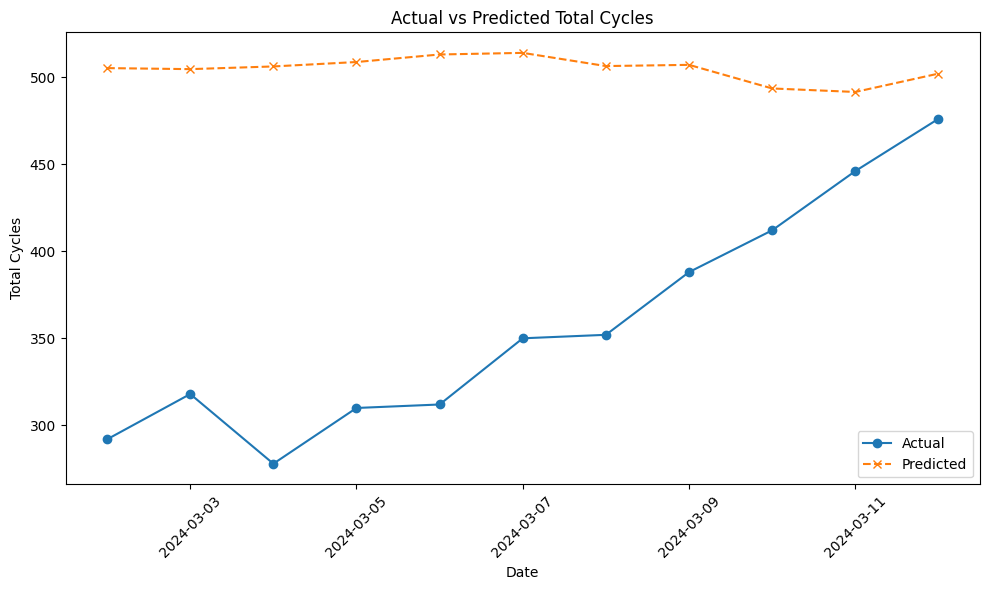

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Date'], mcn_df['TotalCycles'].head(11), label='Actual', marker='o')
plt.plot(evaluation_df['Date'], evaluation_df['PredictedTotalCycles'], label='Predicted', linestyle='--', marker='x')
plt.title('Actual vs Predicted Total Cycles')
plt.xlabel('Date')
plt.ylabel('Total Cycles')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


mae = mean_absolute_error(y_val. y_pred)
mse = mean_squared_error(y_val ,y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"RMean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

AttributeError: 'numpy.ndarray' object has no attribute 'y_pred'